In [1]:
from multiplot import *

directory = 'runs'
graphOut = mp(directory)

## pull out the plot data from the function if needed
# dirs = graphOut['dirs']
# count = graphOut['count']
# dfRewards = graphOut['dfRewards']
# dfLength = graphOut['dfLengths']
# groupMeanRewards = graphOut['groupMeanRewards']
# groupStdRewards = graphOut['groupStdRewards']
# groupMeanLengths = graphOut['groupMeanLengths']
# groupStdLengths = graphOut['groupStdLengths']
# eps = graphOut['eps']

print(dirs)
dfRewards.head()

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


['test1', 'test2', 'test3', 'test4', 'test5', 'test6']


,test1,test2,test3,test4,test5,test6
0,18.0,47.0,12.0,10.0,18.0,12.0
1,15.0,21.0,22.0,15.0,10.0,35.0
2,14.0,16.0,12.0,41.0,11.0,70.0
3,32.0,16.0,13.0,20.0,15.0,28.0
4,11.0,14.0,12.0,20.0,13.0,9.0


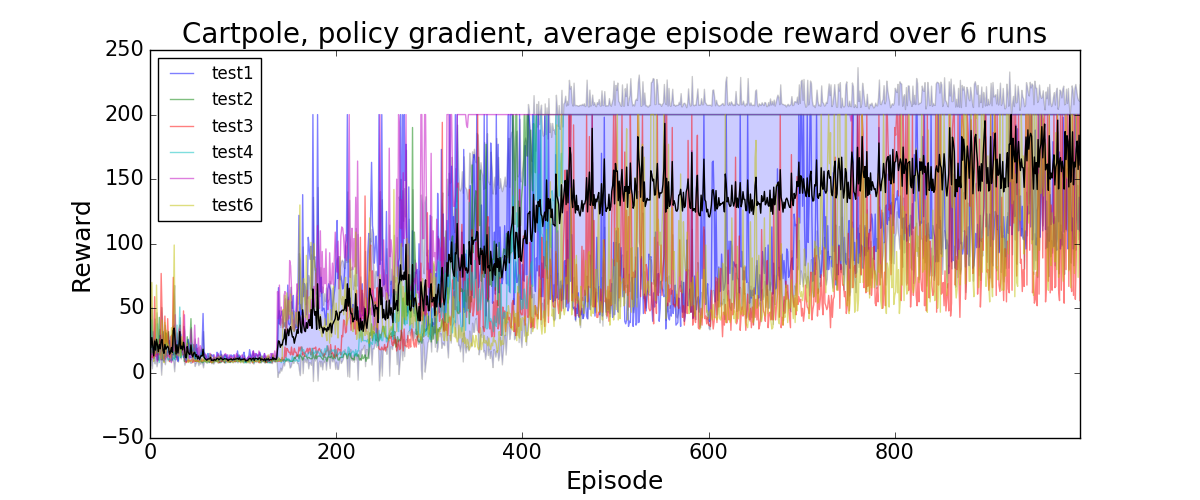

In [13]:
## images are saved to the images directory
from IPython.display import Image
Image(filename='images/example-reward.png')

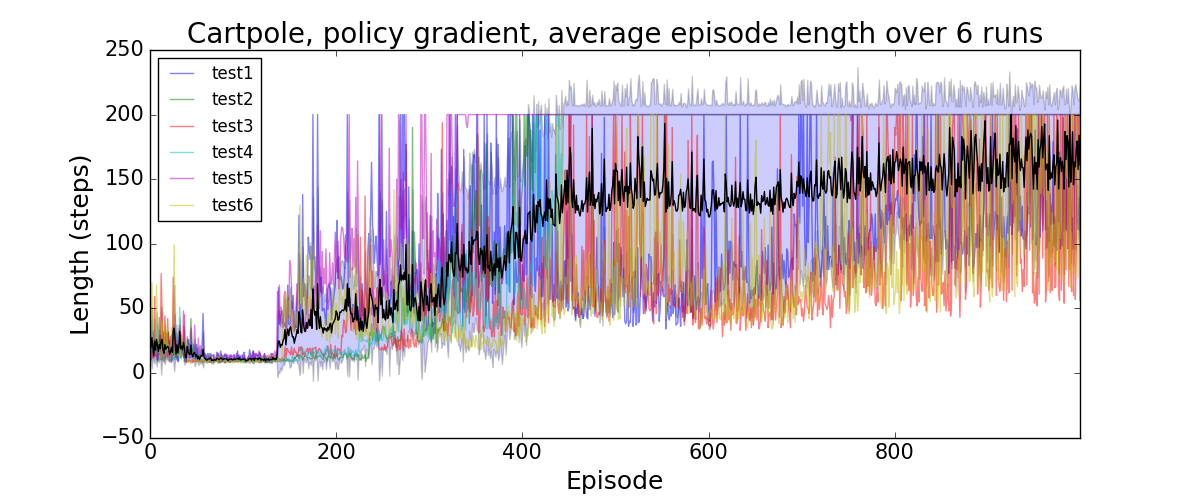

In [14]:
Image(filename='images/example-length.png')